# Heart Stroke Analysis 

In [1]:
#importing Required library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing plotly Library
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode 
cf.go_offline()

In [3]:
#importing the data base

df=pd.read_csv(r"C:\Users\prash\healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# Deleting the unnecessary data
del df["id"]

In [7]:
# Duplicates values
df.duplicated().sum()

0

In [8]:
#checking the NaN values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df.dropna(how='any',inplace=True)

In [10]:
 #checking the NaN values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:>

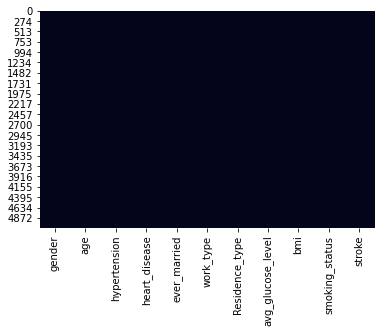

In [11]:
sns.heatmap(df.isnull(), cbar=False)

In [12]:
 #Reading Column Names
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

The max heart stroke patients are married


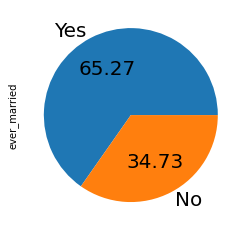

In [13]:
df.ever_married.value_counts().plot.pie(fontsize = 20, autopct = '%.2f')
print('The max heart stroke patients are married')

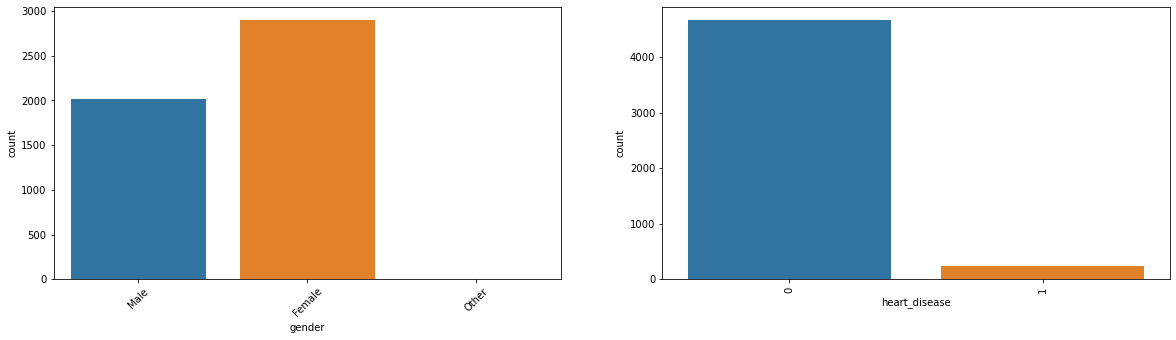

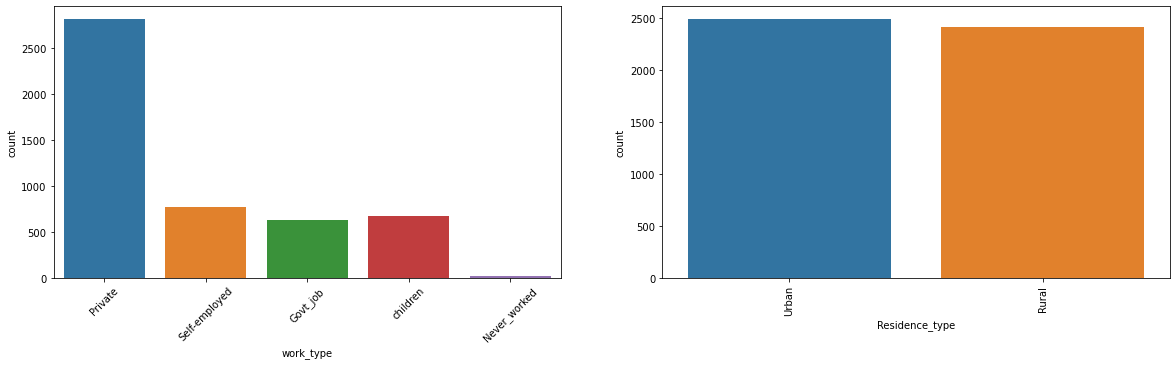

In [14]:
cat_cols = ['gender','heart_disease','work_type','Residence_type']
i=0
while i < 4:
    fig = plt.figure(figsize=[20,5])
    
    
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    plt.xticks(rotation=45)
    i += 1
    
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    plt.xticks(rotation=90)
    i += 1
    
    plt.show()

The listing of female count is more for heart stroke.
Private sector jobs people are most affected than other work type.
The listing of the people are from the urban areas are high.

In [15]:
df.smoking_status.value_counts().head().iplot(kind="bar")

The people who never smoke have high listing count 

In [16]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


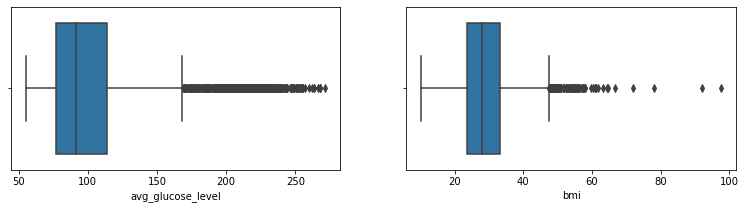

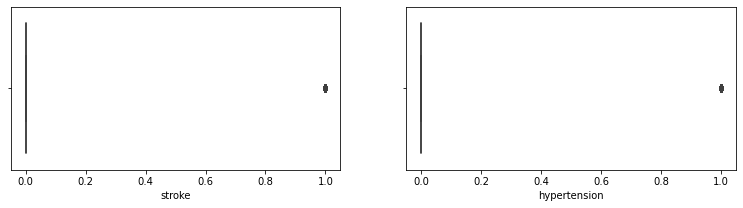

In [17]:
num_cols = ['avg_glucose_level','bmi','stroke','hypertension']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

Out liers are less in data set

In [18]:
df.sort_values(ascending=False,by="bmi").head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0
928,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
544,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
1559,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0
358,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0
4188,Female,27.0,0,0,Yes,Private,Rural,57.96,64.4,never smoked,0
2764,Female,24.0,0,0,Yes,Private,Urban,85.55,63.3,never smoked,0
3825,Female,52.0,0,0,Yes,Private,Rural,118.46,61.6,smokes,0
2840,Female,52.0,0,0,Yes,Private,Urban,98.27,61.2,Unknown,0


The person with highest bmi is male of age 17 and has highest weight too.

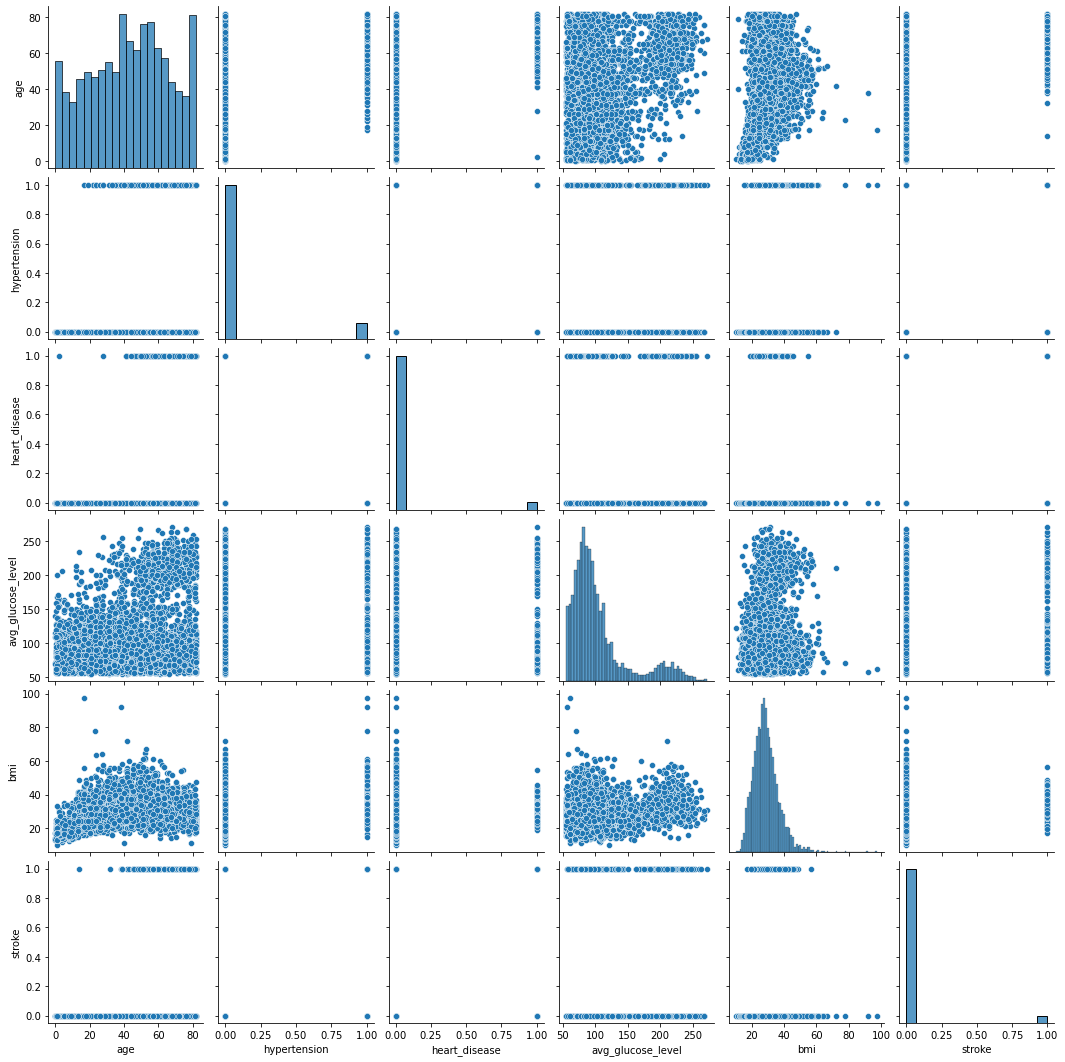

In [19]:
sns.pairplot(df)

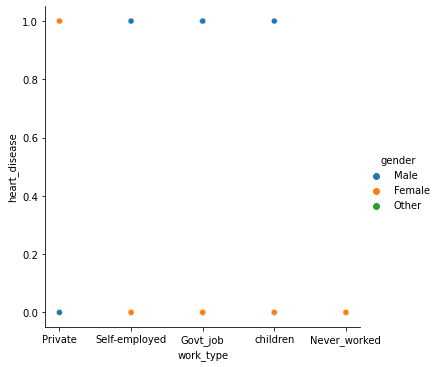

In [20]:
sns.relplot(x=df.work_type,y=df.heart_disease,hue=df.gender)

In private female has more heart disease.
In remaining other sectors male has high heart disease.

In [21]:
df.avg_glucose_level.value_counts().sort_values(ascending=False).iplot(kind="bar")

The max average glucose count is 6 mg/dL .

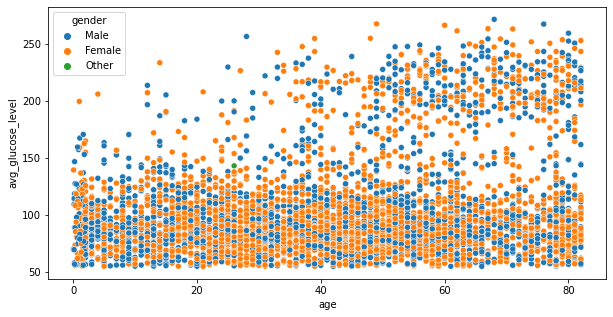

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="age",y='avg_glucose_level',hue='gender',data=df)
plt.show()

The male has highest avg glucose level of age between 60-80.

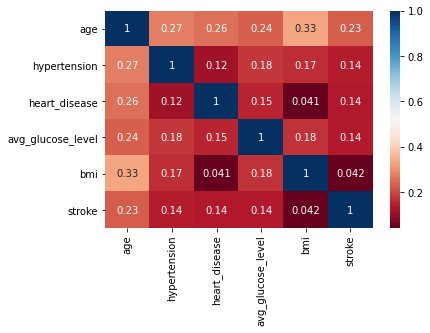

In [34]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

The relation between dat sets is positive but max data set are low positive correlated.

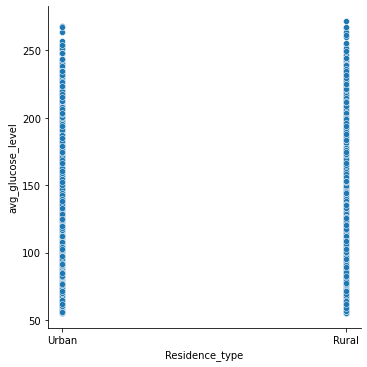

In [37]:
sns.relplot(x=df.Residence_type,y=df.avg_glucose_level)

Rural areas people has high glucose level.